In [32]:
import numpy as np
import pandas as pd
df = np.load('C://jmchika/Right_ULF_p_1.npy')

In [33]:
len(df[:300])

300

In [34]:
df_D = pd.DataFrame(df[:300,3,:])
df_D = df_D.assign(category = "first")
df_D = df_D.set_index(['category'])
df_D.columns= ['x','y','z']

In [35]:
df_E = pd.DataFrame(df[:300,7,:])
df_E = df_E.assign(category = "second")
df_E = df_E.set_index(['category'])
df_E.columns= ['x','y','z']

In [36]:
df_F = pd.DataFrame(df[:300,11,:])
df_F = df_F.assign(category = "third")
df_F = df_F.set_index(['category'])
df_F.columns= ['x','y','z']

In [37]:
a =[]
for i in range(100):
     a.append(df_D[3*i:3*(i+1)].mean())

In [38]:
b =[]
for i in range(100):
     b.append(df_E[3*i:3*(i+1)].mean())

In [39]:
c =[]
for i in range(100):
     c.append(df_F[3*i:3*(i+1)].mean())

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import seaborn as sns
#from statsmodels.formula.api import ols

In [41]:
da1 = pd.DataFrame([[a[0][0],a[0][1],a[0][2]]], columns=['x','y','z'])
da2 = pd.DataFrame([[b[0][0],b[0][1],b[0][2]]], columns=['x','y','z'])
da3 = pd.DataFrame([[c[0][0],c[0][1],c[0][2]]], columns=['x','y','z'])
da = pd.concat([da1,da2,da3])

<AxesSubplot:xlabel='x', ylabel='y'>

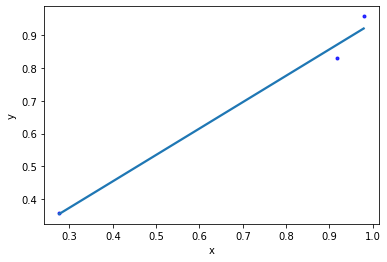

In [42]:
sns.regplot(x="x", y="y", data=da, order=1, ci=None, scatter_kws={'color':'b', 's':9})

In [43]:
dat = pd.DataFrame()
data = pd.DataFrame()
for i in range(100):
    da1 = pd.DataFrame([[a[i][0],a[i][1],a[i][2]]], columns=['first_x','first_y','first_z'])
    da2 = pd.DataFrame([[b[i][0],b[i][1],b[i][2]]], columns=['second_x','second_y','second_z'])
    da3 = pd.DataFrame([[c[i][0],c[i][1],c[i][2]]], columns=['third_x','third_y','third_z'])
    dat = pd.concat([da1, da2, da3], axis =1)
    data = pd.concat([data, dat])

In [44]:
data.reset_index(drop=True)

,first_x,first_y,first_z,second_x,second_y,second_z,third_x,third_y,third_z
0,0.276467,0.357904,0.357117,0.978835,0.958698,0.916726,0.917934,0.831079,0.856390
1,0.272159,0.355869,0.353319,1.005806,0.971796,0.918168,0.914743,0.822329,0.844599
2,0.277548,0.361795,0.357851,1.014163,0.976318,0.921959,0.918024,0.824290,0.849048
3,0.281013,0.364906,0.361204,1.012416,0.971560,0.917214,0.915121,0.820981,0.844637
4,0.285725,0.371424,0.369091,1.015244,0.972819,0.917689,0.912886,0.820749,0.843952
...,...,...,...,...,...,...,...,...,...
95,0.197118,0.308250,0.306947,0.916111,0.861175,0.799277,0.799794,0.683510,0.712174
96,0.199034,0.311633,0.311882,0.933485,0.874916,0.810004,0.813336,0.698293,0.724960
97,0.193796,0.307241,0.301895,0.936416,0.881531,0.819616,0.821142,0.701002,0.737136
98,0.189581,0.298714,0.294889,0.922774,0.870814,0.809211,0.811692,0.691254,0.726100


<AxesSubplot:>

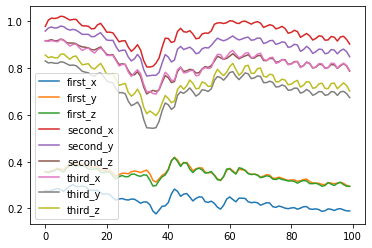

In [45]:
data.reset_index(drop='True').plot.line()

<AxesSubplot:>

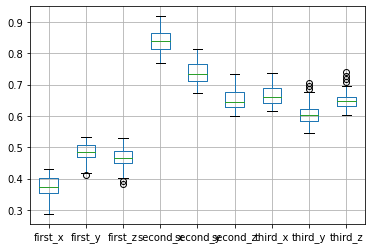

In [17]:
data.boxplot()

In [16]:
data.isnull().sum()

first_x     0
first_y     0
first_z     0
second_x    0
second_y    0
second_z    0
third_x     0
third_y     0
third_z     0
dtype: int64

In [17]:
linearReg[:, 1]

NameError: name 'linearReg' is not defined

In [ ]:
import cv2
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
cap = cv2.VideoCapture(0)
position=np.zeros((1,21,2))
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_height, image_width, _ = image.shape
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    annotated_image = image.copy()
    x=[]
    y=[]
    
    if results.multi_hand_landmarks:  
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

            box2=[]
            for point in mp_hands.HandLandmark:
                #상대좌표 (0~1)
                normalizedLandmark = hand_landmarks.landmark[point]
                box2.append((int(normalizedLandmark.x*image_width), int(normalizedLandmark.y*image_height)))
                x.append(normalizedLandmark.x)
                y.append(normalizedLandmark.y)
            #frame_array=np.vstack((x,y)).reshape(1,21,2)
            #position=np.vstack((position,frame_array))
            #data1 = pd.DataFrame(x[3],x)
            cv2.line(annotated_image, box2[3], box2[6], (0,0,255), 5)
    #data preprocessing
                
    # Flip the image horizontally for a selfie-view display.
  # cv2.line(image, (10,10),(350,10),(0,0,255),5)
    cv2.imshow('MediaPipe Hands', cv2.flip(annotated_image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

In [ ]:
image_files = ['C:/Users/hanah/Desktop/MBA/pytorch/image.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for idx, file in enumerate(image_files):
    #이미지를 읽어들이고, 보기 편하게 이미지 좌우 반전
    image = cv2.flip(cv2.imread(file),1)
    #작업 전에 BGR -> RGB 변환
    results = hands.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    
    # 손으로 프린트하고 이미지에 손 랜드마크를 그립니다.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    x=[]
    y=[]
    z=[]
    for hand_landmarks in results.multi_hand_landmarks:
        print('hand_landmarks:', hand_landmarks)
        for point in results.multi_hand_landmarks[0].landmark:
            x.append(point.x)
            y.append(point.y)
            z.append(point.z)
        mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
        frame_array = np.vstack((x,y,z))

In [ ]:
fa = frame_array

In [ ]:
ju1 = pd.DataFrame([[fa[0][3],fa[1][3],fa[2][3]]], columns=['x','y','z'])
ju2 = pd.DataFrame([[fa[0][7],fa[1][7],fa[2][7]]], columns=['x','y','z'])
ju3 = pd.DataFrame([[fa[0][11],fa[1][11],fa[2][11]]], columns=['x','y','z'])
ju = pd.concat([ju1,ju2,ju3])  

In [ ]:
ju

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
J = ju[['x', 'y', 'z']].values
Jlen = J.shape[0]
avgPointCloud = 1 / Jlen * np.array([np.sum(J[:, 0]), np.sum(J[:, 1]), np.sum(J[:, 2])])
Jmean = J - avgPointCloud

cov = 1 / Jlen * J.T.dot(Jmean)

t = np.arange(-500, 500, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

ax.scatter(ju['x'],ju['y'],ju['z'])
ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'r', label='Linear Regression')
ax.legend()
ax.view_init(90, 90)
plt.show()

In [ ]:
linearReg[:, 0]

In [ ]:
linearReg[:, 1]

In [ ]:
img = cv2.imread('C:/Users/hanah/Desktop/MBA/pytorch/image.jpg')
img = cv2.resize(img,(640,480))  

In [ ]:
def calculate():
    a=round(linearReg[0][0]*640)
    b=round(linearReg[-1][0]*640)
    c=round(linearReg[0][1]*480)
    d=round(linearReg[-1][1]*480)
    return (a,c), (b,d)

In [ ]:
cv2.line(img,calculate()[0],calculate()[1],(0,0,255))    
cv2.imshow('Line',img)
#cv2.waitKey()
#cv2.destroyAllWindows()